# Importando as bibliotecas necessárias

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics  # Para avaliação do modelo
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
df= pd.read_excel('Forms_ConstruConecta.xlsx')
df

,Índice,Dificuldade_Materiais_Pessoas,Faixa_Etaria,Realizou_Obra,Desafios,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Usuaria_App,Valorizacao_Sustentabilidade,Funcionalidade_no_App
0,0,Não,18 - 20,Não,Não Informado,Sim,Sim,Não,Sim,Importante,Não Informado
1,1,Sim,18 - 20,Sim,Custo,Não,Sim,Não,Sim,Muito Importante,Contratação de serviços
2,2,Sim,31 - 50,Sim,Profissionais Qualificados,Não,Sim,Sim,Sim,Muito Importante,"Disponibilidade, prazo, custo, qualidade"
3,3,Sim,51 - 70,Não,Não Informado,Não,Sim,Sim,Sim,Muito Importante,Localização das iportunidades
4,4,Sim,71 - 80,Sim,Profissionais Qualificados,Sim,Sim,Não,Sim,Importante,Seviços de profiossionais e materiais de const...
...,...,...,...,...,...,...,...,...,...,...,...
267,267,Sim,51 - 70,Sim,Profissionais Qualificados,Sim,Sim,Não,Sim,Importante,Bastante relevante
268,268,Sim,51 - 70,Não,Não Informado,Não,Sim,Não Informado,Sim,Muito Importante,Economia e sustentabilidade
269,269,Sim,31 - 50,Sim,Profissionais Qualificados,Não,Sim,Não,Não,Importante,Não sei
270,270,Sim,31 - 50,Sim,Profissionais Qualificados,Não,Sim,Não,Sim,Muito Importante,Seriedade e acessibilidade


In [3]:
# não = 0
# sim = 1
# não informado = 2 

le = LabelEncoder()

colunas_selecionadas = ['Dificuldade_Materiais_Pessoas', 'Realizou_Obra', 'Satisfacao_Atual', 'Realizaria_Reforma', 'Condicoes_Financeiras','Usuaria_App']

for i in colunas_selecionadas:
    df[i] = le.fit_transform(df[i])
display(df)

,Índice,Dificuldade_Materiais_Pessoas,Faixa_Etaria,Realizou_Obra,Desafios,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Usuaria_App,Valorizacao_Sustentabilidade,Funcionalidade_no_App
0,0,0,18 - 20,0,Não Informado,1,1,0,1,Importante,Não Informado
1,1,1,18 - 20,1,Custo,0,1,0,1,Muito Importante,Contratação de serviços
2,2,1,31 - 50,1,Profissionais Qualificados,0,1,2,1,Muito Importante,"Disponibilidade, prazo, custo, qualidade"
3,3,1,51 - 70,0,Não Informado,0,1,2,1,Muito Importante,Localização das iportunidades
4,4,1,71 - 80,1,Profissionais Qualificados,1,1,0,1,Importante,Seviços de profiossionais e materiais de const...
...,...,...,...,...,...,...,...,...,...,...,...
267,267,1,51 - 70,1,Profissionais Qualificados,1,1,0,1,Importante,Bastante relevante
268,268,1,51 - 70,0,Não Informado,0,1,1,1,Muito Importante,Economia e sustentabilidade
269,269,1,31 - 50,1,Profissionais Qualificados,0,1,0,0,Importante,Não sei
270,270,1,31 - 50,1,Profissionais Qualificados,0,1,0,1,Muito Importante,Seriedade e acessibilidade


In [4]:
df = df.drop('Faixa_Etaria', axis=1)
df = df.drop('Desafios', axis=1)
df = df.drop('Valorizacao_Sustentabilidade', axis=1)
df = df.drop('Funcionalidade_no_App', axis=1)
df

,Índice,Dificuldade_Materiais_Pessoas,Realizou_Obra,Satisfacao_Atual,Realizaria_Reforma,Condicoes_Financeiras,Usuaria_App
0,0,0,0,1,1,0,1
1,1,1,1,0,1,0,1
2,2,1,1,0,1,2,1
3,3,1,0,0,1,2,1
4,4,1,1,1,1,0,1
...,...,...,...,...,...,...,...
267,267,1,1,1,1,0,1
268,268,1,0,0,1,1,1
269,269,1,1,0,1,0,0
270,270,1,1,0,1,0,1


In [5]:
X = df.drop('Usuaria_App', axis=1)  
y = df['Usuaria_App']  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None)  # Mudar parâmetros como desejar

In [8]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred = clf.predict(X_test)

In [10]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7804878048780488


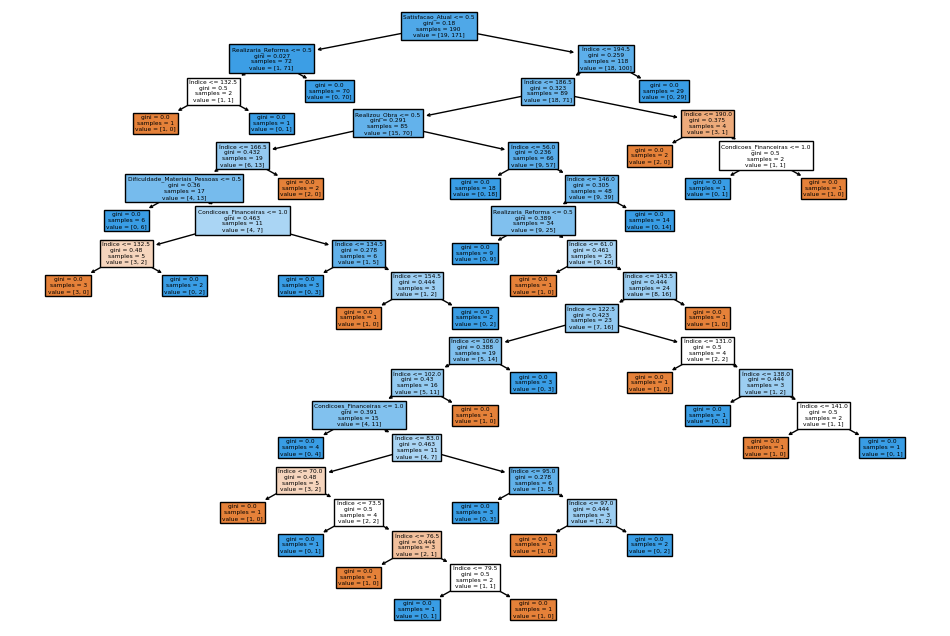

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=list(X.columns))
plt.show()

### Grid Search

In [12]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],  # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de amostras em uma folha
    'bootstrap': [True, False]  # Se usar bootstrap ou não
}

## Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Melhores parâmetros:", best_params)


best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)


accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

print("Acurácia:", accuracy_optimized)
print("Precisão:", precision_optimized)
print("Recall:", recall_optimized)
print("F1-score:", f1_optimized)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Melhores parâmetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Acurácia: 0.9024390243902439
Precisão: 0.9024390243902439
Recall: 1.0
F1-score: 0.9487179487179488


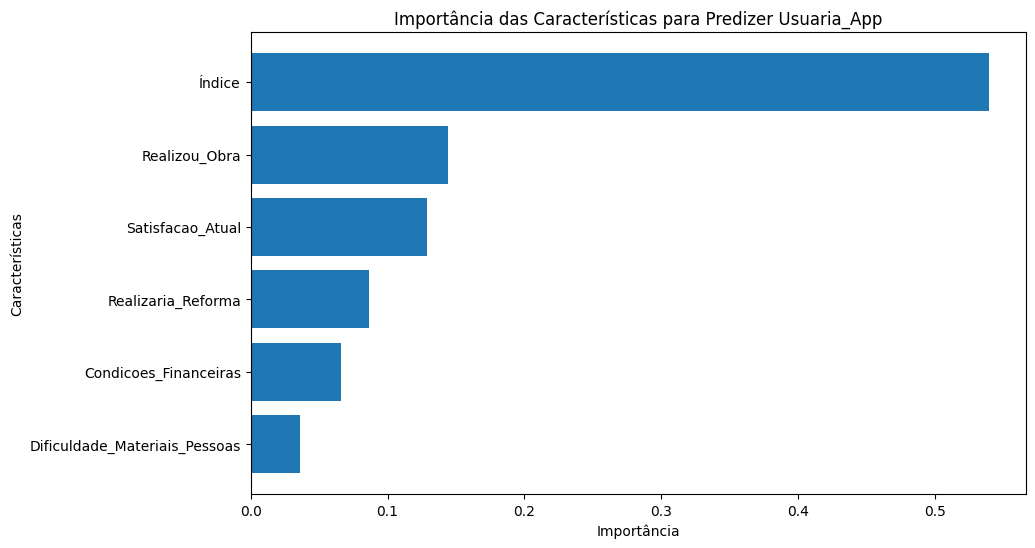

In [14]:
import matplotlib.pyplot as plt

# Importância das características do modelo otimizado
importances = best_model.feature_importances_

# Colocar as importâncias em um DataFrame para visualização
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotar a importância das características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.ylabel('Características')
plt.title('Importância das Características para Predizer Usuaria_App')
plt.gca().invert_yaxis()
plt.show()
